#STUDENT NOTEBOOK
   - Student : Kornelia Machnicka
   
Data Science - University of Deusto

##Libraries

Be sure all the needed libraries for the proper execution of the code without errors are included here.

In [ ]:
packages = c("tidyverse", "glue", "knitr", "jsonlite", "rvest", "fastDummies")
newpack  = packages[!(packages %in% installed.packages()[,"Package"])]
if(length(newpack)) install.packages(newpack)
a=lapply(packages, library, character.only=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




##Exercise 01: Tidyverse basics

Using data in the file *game_of_thrones_imdb.csv*:


**POINT 1:**

Identify the highest-rated (imdb_rating) and lowest-rated episodes for each season. Return a dataset that includes the columns season, title, imdb_rating, and a new column called ranking indicating whether the episode is the "best" or the "worst" of the season.

In [ ]:
rm(list = ls()) #This command is included to avoid confusion with previously declared variables

data = read.csv("./game_of_thrones_imdb.csv")
data_ranking = data %>%
  group_by(season) %>%
  mutate(max_rating = max(imdb_rating, na.rm = T),    #removing NA values to obtain good calculations
         min_rating = min(imdb_rating, na.rm = T)) %>%
  filter(imdb_rating == max_rating | imdb_rating == min_rating) %>%
  mutate(ranking = case_when(
                          imdb_rating == max_rating ~ "best",
                          imdb_rating == min_rating ~ "worst")) %>%
  select(season, title, imdb_rating, ranking)

knitr::kable(data_ranking)



| season|title                          | imdb_rating|ranking |
|------:|:------------------------------|-----------:|:-------|
|      1|Lord Snow                      |         8.5|worst   |
|      1|Baelor                         |         9.6|best    |
|      2|The Night Lands                |         8.4|worst   |
|      2|Blackwater                     |         9.6|best    |
|      3|Dark Wings, Dark Words         |         8.5|worst   |
|      3|The Rains of Castamere         |         9.9|best    |
|      4|The Lion and the Rose          |         9.7|best    |
|      4|First of His Name              |         8.6|worst   |
|      4|The Laws of Gods and Men       |         9.7|best    |
|      4|The Mountain and the Viper     |         9.7|best    |
|      5|Unbowed, Unbent, Unbroken      |         7.9|worst   |
|      5|Hardhome                       |         9.8|best    |
|      6|Blood of My Blood              |         8.3|worst   |
|      6|No One                       

**POINT 2:**

Calculate an "average episode" for each season based on the average ratings (imdb_rating) and votes (total_votes). Create a dataset with columns season, avg_rating, and avg_votes. Then, sort the seasons by the average number of votes in descending order.

In [ ]:
data_average = data %>%
  group_by(season) %>%
  summarise(avg_rating = mean(imdb_rating, na.rm = T),  #calculating the mean value to obtain average episode
            avg_votes = mean(total_votes, na.rm = T)) %>%
  select(season, avg_rating, avg_votes) %>%
  arrange(desc(avg_votes))

knitr::kable(data_average)



| season| avg_rating| avg_votes|
|------:|----------:|---------:|
|      8|   6.433333| 177794.33|
|      6|   8.990000|  67475.10|
|      7|   9.028571|  56502.43|
|      4|   9.240000|  39393.30|
|      5|   8.740000|  37860.50|
|      3|   8.950000|  36131.60|
|      1|   8.980000|  35616.70|
|      2|   8.820000|  30263.90|

**POINT 3:**

For each episode, calculate the difference between its rating (imdb_rating) and the average rating of the episodes in its season. Add this difference as a new column called rating_diff and return only the episodes where this difference is greater than 1 or less than -1.

In [ ]:
data_difference = data %>%
  group_by(season) %>%
  mutate(rating_diff = imdb_rating - mean(imdb_rating, na.rm = T)) %>%
  select(season, title, imdb_rating, rating_diff) %>%
  filter(rating_diff > 1 | rating_diff < -1)

knitr::kable(data_difference)



| season|title                          | imdb_rating| rating_diff|
|------:|:------------------------------|-----------:|-----------:|
|      5|Hardhome                       |         9.8|    1.060000|
|      8|Winterfell                     |         7.6|    1.166667|
|      8|A Knight of the Seven Kingdoms |         7.9|    1.466667|
|      8|The Long Night                 |         7.5|    1.066667|
|      8|The Iron Throne                |         4.1|   -2.333333|

**POINT 4:**

Divide the episodes of each season into two groups: those with a rating above the season's average and those with a rating equal to or below it. Return a dataset with the columns season, above_avg_count, and below_avg_count, representing the number of episodes in each group for each season.

In [ ]:
data_new = data %>%
  group_by(season) %>%
  summarise(avg_rating = mean(imdb_rating, na.rm = T),
            above_avg_count = sum(imdb_rating > avg_rating, na.rm = T),
            below_avg_count = sum(imdb_rating <= avg_rating, na.rm = T)) %>%
  select(season, above_avg_count, below_avg_count)

knitr::kable(data_new)



| season| above_avg_count| below_avg_count|
|------:|---------------:|---------------:|
|      1|               6|               4|
|      2|               3|               7|
|      3|               3|               7|
|      4|               5|               5|
|      5|               4|               6|
|      6|               5|               5|
|      7|               3|               4|
|      8|               3|               3|

##Exercise 02: Data Sources

**POINT 1:**

The OpenCage Geocoder API (https://opencagedata.com/) provides access to geographical names and location information based on latitude and longitude coordinates. You have to:
To perform the necessary operations to generate random geographical coordinates, with latitudes ranging from -90 to 90 and longitudes ranging from -180 to 180
To use the API to retrieve the names of the following geographical elements for each coordinate: the city, the state, the country, the continent, and the body of water. The retrieved data should be stored in a data frame with one row per coordinate and columns corresponding to these fields. If the API returns a NULL for any field, it should be recorded as NA.
The data collection should continue until the data frame contains at least ten entries with a non-NA value in the continent field.

**Explanation:**

From the API documentation available on web page, I obtained the information of how to get required api key, correct url, parameters to pass in url.

While loop is used to collect data until the data frame contains at least ten entries with a non-NA value in the continent field. In every call of the while loop, one variable for latitude and one for longitude is generated.

In documentation for R I found function *is.null()* to check if any of the values is NULL. To check if the value for continent is NA, I use function *is.na()* introduced in DS08 Demo Code.

From the response from API, relevant data is obtained. If it's null, NA is assigned. Then a new row with the data is added to the data frame.

In [ ]:
rm(list = ls()) #This command is included to avoid confusion with previously declared variables

url = "https://api.opencagedata.com/geocode/v1/json"
api_key = "8a3b595eb54e4df98feec2d8833b9982"

geo_data = data.frame(matrix(NA, nrow = 0, ncol = 7), stringsAsFactors = FALSE)

i = 0
while(i < 10) {
  latitude = runif(n = 1, min = -90, max = 90)
  longitude = runif(n = 1, min = -180, max = 180)
  location = glue("{latitude}, {longitude}")

  res = httr::GET(url, query = list(q = location, key = api_key))
  data = fromJSON(rawToChar(res$content))

  city = ifelse(!is.null(data$results$components$`_normalized_city`), data$results$components$`_normalized_city`, NA)
  state = ifelse(!is.null(data$results$components$state), data$results$components$state, NA)
  country = ifelse(!is.null(data$results$components$country), data$results$components$country, NA)
  continent = ifelse(!is.null(data$results$components$continent), data$results$components$continent, NA)
  body_of_water = ifelse(!is.null(data$results$components$body_of_water), data$results$components$body_of_water, NA)

  new_row = data.frame(latitude, longitude, city, state, country, continent, body_of_water, stringsAsFactors = FALSE)
  geo_data = rbind(geo_data, new_row)

  if(!is.na(continent)) {
    i = i + 1
  }

}

knitr::kable(geo_data)



|   latitude|   longitude|city    |state               |country       |continent     |body_of_water        |
|----------:|-----------:|:-------|:-------------------|:-------------|:-------------|:--------------------|
| -21.913571| -109.029875|NA      |NA                  |NA            |NA            |Chilean Sea          |
|  47.212987| -106.036052|NA      |Montana             |United States |North America |NA                   |
| -47.555410|   58.225097|NA      |NA                  |NA            |NA            |Indian Ocean         |
|   5.047894|   67.827442|NA      |NA                  |NA            |NA            |Indian Ocean         |
|  23.782952|  -88.365634|NA      |NA                  |NA            |NA            |Gulf of Mexico       |
| -88.111381|   -1.327475|NA      |NA                  |NA            |NA            |NA                   |
|  87.172789|  -47.668019|NA      |NA                  |NA            |NA            |NA                   |
| -41.507004|  -1

**POINT 2:**

The OpenWeatherMap API (https://open-meteo.com/) provides weather information for specific geographical coordinates. You have to:
Using the previously created data frame, and considering only the entries with a non-NA value in the continent field, retrieve the following weather information for each corresponding coordinate: the time of the last weather measurement, the temperature at 2 meters above ground level, the relative humidity at that point, the apparent temperature, the weather code, and a logical value indicating whether it was day or night at the time of measurement.
These fields should be added as new columns in the data frame.

**Explanation:**

From the API documentation available on web page, I obtained the information of the correct url and the parameters to pass in it.

Firstly, new columns are added and filled with NA values. Then, for every row in data frame *geo_data*, new data from this API is collected and added at appropriate positions in the data frame.

In [ ]:
url = "https://api.open-meteo.com/v1/forecast"

geo_data$last_measurement = NA
geo_data$temperature_2m = NA
geo_data$relative_humidity_2m = NA
geo_data$apparent_temperature = NA
geo_data$weather_code = NA
geo_data$is_day = NA

for(i in 1:nrow(geo_data)) {

  if(!is.na(geo_data$continent[i])) {

    res = httr::GET(url, query = list(latitude = geo_data$latitude[i],
                                      longitude = geo_data$longitude[i],
                                      current = paste("temperature_2m", "relative_humidity_2m", "apparent_temperature", "weather_code", "is_day", sep=",") ))

    data = fromJSON(rawToChar(res$content))

    last_measurement = data$current$time
    temperature_2m = data$current$temperature_2m
    relative_humidity_2m = data$current$relative_humidity_2m
    apparent_temperature = data$current$apparent_temperature
    weather_code = data$current$weather_code
    is_day = data$current$is_day  #1 if day, 0 night

    geo_data$last_measurement[i] = last_measurement
    geo_data$temperature_2m[i] = temperature_2m
    geo_data$relative_humidity_2m[i] = relative_humidity_2m
    geo_data$apparent_temperature[i] = apparent_temperature
    geo_data$weather_code[i] = weather_code
    geo_data$is_day[i] = is_day

  }
}

knitr::kable(geo_data)



|   latitude|   longitude|city    |state               |country       |continent     |body_of_water        |last_measurement | temperature_2m| relative_humidity_2m| apparent_temperature| weather_code| is_day|
|----------:|-----------:|:-------|:-------------------|:-------------|:-------------|:--------------------|:----------------|--------------:|--------------------:|--------------------:|------------:|------:|
| -21.913571| -109.029875|NA      |NA                  |NA            |NA            |Chilean Sea          |NA               |             NA|                   NA|                   NA|           NA|     NA|
|  47.212987| -106.036052|NA      |Montana             |United States |North America |NA                   |2025-04-04T19:30 |            3.9|                   39|                 -1.5|            1|      1|
| -47.555410|   58.225097|NA      |NA                  |NA            |NA            |Indian Ocean         |NA               |             NA|                   N

##Exercise 03: Transformation and profiling

Using dataset *Skyrim_Weapons.csv*:

**POINT 1:**

Discretize the Damage column into three categories: "Low" for values less than 15, "Medium" for values between 15 and 30 (inclusive of 15 but exclusive of 30), and "High" for values greater than or equal to 30. Create a new column called Damage_Level to store these categories. Then, generate dummy variables for the Category column, where each unique category becomes a binary column. Finally, group the dataset by Damage_Level and calculate the sum of each dummy variable within each group. Return a summary table where rows correspond to Damage_Level ("Low", "Medium", "High") and columns represent the sum of the dummy variables for each category.







**Explanation:**

The *Damage* column is discretized into three categories with the use of *mutate()* and *case_when()*.

Dummy variables for the *Category* column are created with the function *dummy_cols()*.

Then, names of the columns of the data frame *data_disc* are printed in order to obtain proper names that will be used in *summarise()* function.

In [ ]:
rm(list = ls()) #This command is included to avoid confusion with previously declared variables

data = read.csv("./Skyrim_Weapons.csv")
data_disc = data %>%
  mutate(Damage_Level = case_when(Damage < 15 ~ "Low",
                                  Damage >= 15 & Damage < 30 ~ "Medium",
                                  Damage >= 30 ~ "High")) %>%
  dummy_cols(select_columns = "Category")

print(colnames(data_disc))

summarised_data = data_disc %>%
  group_by(Damage_Level) %>%
  summarise(ALL_Archery = sum(Category_Archery, na.rm = T),
            `All_One-Handed` = sum(`Category_One-Handed`, na.rm = T),
            `All_Two-Handed` = sum(`Category_Two-Handed`, na.rm = T))

knitr::kable(summarised_data)

 [1] "Name"                "Damage"              "Weight"             
 [4] "Gold"                "Upgrade"             "Perk"               
 [7] "Type"                "Category"            "Speed"              
[10] "Damage_Level"        "Category_Archery"    "Category_One-Handed"
[13] "Category_Two-Handed"




|Damage_Level | ALL_Archery| All_One-Handed| All_Two-Handed|
|:------------|-----------:|--------------:|--------------:|
|Low          |          47|            149|              1|
|Medium       |          24|             12|             60|

**POINT 2:**

Normalize the numeric columns Damage, Weight, Gold, and Speed using min-max normalization. Then, calculate the Euclidean distance matrix using these values. From the distance matrix, extract the 10 weapon pairs with the smallest distances. Return a table with three columns: Weapon_1, Weapon_2, and Distance, sorted in ascending order by distance. Ensure that each pair is unique (i.e., avoid duplicates such as Weapon A - Weapon B and Weapon B - Weapon A).

**Explanation:**

In for loop, for every column in list of columns, minimum and maximum values are obtained, min-max normalization value is calculated and inserted in the right place in data frame.

Then, a matrix is created with computed Euclidean distances for selected columns with the use of function *dist()* (DS10 Outlier Detection). Names for rows and columns are set to names of weapons for clarity.

Data frame *weapon_dist* is created with three columns: *Weapon_1*, *Weapon_2*, and *Distance*.

In nested for loops, we create new rows with suitable values and add rows to the data frame *weapons_dist*. By doing

*for(col in 1:(ncol(distances)-1))* and *for(row in (col+1):nrow(distances))*, we omit the distances calculated between the same weapons and assure not going out of bounds of the matrix.

At the end, data frame is sorted by *Distance* in ascending order and ten weapon pairs with the smallest distances are selected.

In [ ]:
rm(list = ls()) #This command is included to avoid confusion with previously declared variables

data = read.csv("./Skyrim_Weapons.csv")

columns = c("Damage", "Weight", "Gold", "Speed")

for(col in columns) {
  min_val = min(data[[col]], na.rm = T)
  max_val = max(data[[col]], na.rm = T)

  data[[col]] = (data[[col]] - min_val) / (max_val - min_val)
}

distances = as.matrix(dist(data %>% select(all_of(columns))))
rownames(distances) = data$Name
colnames(distances) = data$Name

weapons_dist = data.frame(matrix(NA, nrow = 0, ncol = 3), stringsAsFactors = FALSE)

for(col in 1:(ncol(distances)-1)) {
  for(row in (col+1):nrow(distances)) {

    Weapon_1 = colnames(distances)[col]
    Weapon_2 = rownames(distances)[row]
    Distance = distances[row,col]

    new_row = data.frame(Weapon_1, Weapon_2, Distance, stringsAsFactors = FALSE)
    weapons_dist = rbind(weapons_dist, new_row)
  }
}

weapons_dist = weapons_dist %>%
                arrange(Distance) %>%
                head(10)

knitr::kable(weapons_dist)



|Weapon_1                 |Weapon_2         | Distance|
|:------------------------|:----------------|--------:|
|Dragon Priest Dagger     |Kahvozein's Fang |        0|
|Rundi's Dagger           |Steel Dagger     |        0|
|Akaviri Sword            |Blades Sword     |        0|
|Amren's Family Sword     |Iron Sword       |        0|
|Ancient Nord Sword       |Hjalti's Sword   |        0|
|Queen Freydis's Sword    |Steel Sword      |        0|
|Skyforge Steel Sword     |Vilkas's Sword   |        0|
|Ghorbash's Ancestral Axe |Iron War Axe     |        0|
|Pickaxe                  |Woodcutter's Axe |        0|
|Steel War Axe            |Ulfric's War Axe |        0|

##Exercise 04: Visualizacion and Quality

Using dataset *bgg_dataset.csv*:

**POINT 1:**

For the Domain with less number of games: Create a scatter plot to visualize the relationship between the maximum number of players (Max Players) and the average rating (Rating Average). Use point size to represent the number of users who rated the game (Users Rated) and color to differentiate domains (Domains).

**Explanation:**

In the file bgg_dataset.csv values are separated with a semicolon, that's why sep = ";" is included.

Firstly, since in some rows for *Domains* there are multiple domain names, the rows are separated with the use of function *separate_rows()* (found in documentation for R). Then, sum of games for every domain is calculated with function n() and they are sorted in ascending order. The domain with the least amount of games is extracted.

As the next step, data frame *data* is filtered by the extracted domain and *Rating.Average* values are changed from characters to numeric. Rows with NA values in relevant columns are also removed.

At the end, the scatter plot is created. For better visual clarity, limitation on x-axis is set and two outlier values are removed.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


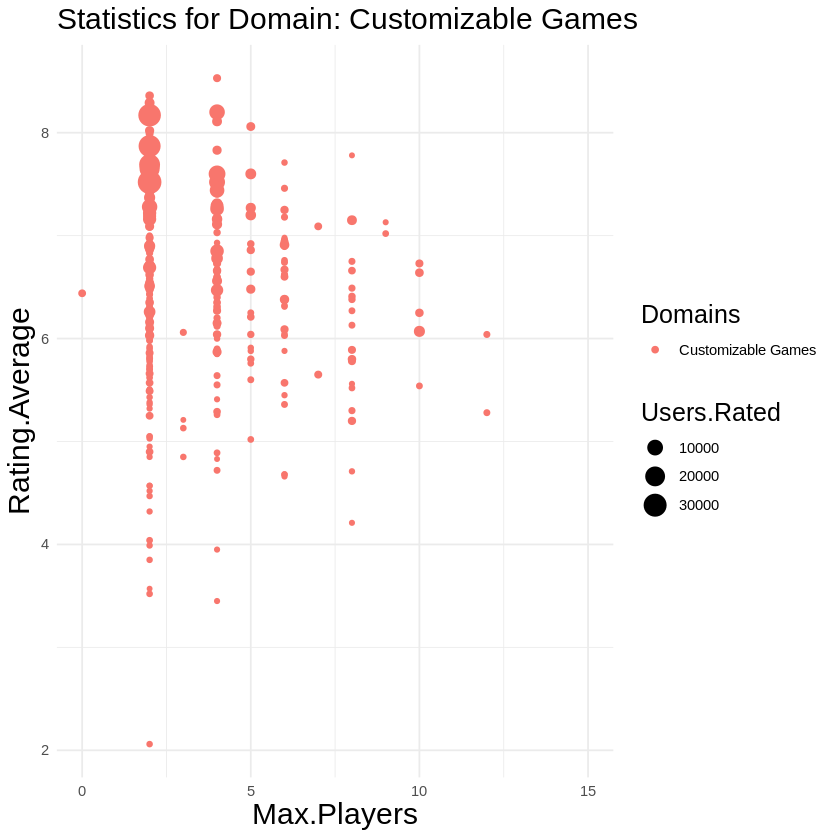

In [ ]:
rm(list = ls()) #This command is included to avoid confusion with previously declared variables

data = read.csv("./bgg_dataset.csv", sep = ";")

data = data %>%
  separate_rows(Domains, sep = ", ")

domain = data %>%
  group_by(Domains) %>%
  summarise(Num_of_Games = n()) %>%
  arrange(Num_of_Games)

domain_name = domain$Domains[1]

data = data %>%
  filter(Domains == domain_name) %>%
  mutate(Rating.Average = as.numeric(gsub(",", ".", Rating.Average))) %>%
  filter(!is.na(Max.Players), !is.na(Rating.Average), !is.na(Users.Rated))

ggplot(data, aes(x = Max.Players, y = Rating.Average, col = Domains)) +
  geom_point(aes(size = Users.Rated)) +
  labs(title = glue("Statistics for Domain: {domain_name}")) +
  xlim(0, 15) +
  theme_minimal() +
  theme(title = element_text(size = 15),
        axis.title = element_text(size = 18))


**POINT 2:**

For each Domains group in the dataset, calculate the interquartile range (IQR) for the columns Play Time and Users Rated. Identify the outliers in each group based on the following rule: a value is an outlier if it is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Create a summary table with the following columns:
Domain: The group name.
Metric: Either Play Time or Users Rated.
Outlier Count: The number of outliers detected in that metric within the domain.

**Explanation:**

Firstly, since in some rows for *Domains* there are multiple domain names, the rows are separated with the use of function *separate_rows()* (found in documentation for R).

Then with the use of *quantile()* (DS06 Profiling), suitable percentails and interquartile ranges are calculated for columns *Play Time* and *Users Rated*. In new columns *outlier_Play.Time* and *outlier_Users.Rated* logical values, whether the value is an outlier or not, are stored.

The summary table is created and function *pivot_longer()* (DS012 Table Transformation and R documentation) is used to transform the table. At the end, names in *Metric* column are changed to appropriate names.

In [ ]:
rm(list = ls()) #This command is included to avoid confusion with previously declared variables

data = read.csv("./bgg_dataset.csv", sep = ";")

data = data %>%
  separate_rows(Domains, sep = ", ") %>%
  group_by(Domains) %>%
  mutate(Q1_Play.Time = quantile(Play.Time, 0.25, na.rm = T),
         Q3_Play.Time = quantile(Play.Time, 0.75, na.rm = T),
         IQR_Play.Time = Q3_Play.Time - Q1_Play.Time,

         Q1_Users.Rated = quantile(Users.Rated, 0.25, na.rm = T),
         Q3_Users.Rated = quantile(Users.Rated, 0.75, na.rm = T),
         IQR_Users.Rated = Q3_Users.Rated - Q1_Users.Rated,

         outlier_Play.Time = (Play.Time < Q1_Play.Time - 1.5 * IQR_Play.Time) | (Play.Time > Q3_Play.Time - 1.5 * IQR_Play.Time),
         outlier_Users.Rated = (Users.Rated < Q1_Users.Rated - 1.5 * IQR_Users.Rated) | (Users.Rated > Q3_Users.Rated - 1.5 * IQR_Users.Rated))


summary = data %>%
  group_by(Domains) %>%
  summarise(Outliers_Play.Time = sum(outlier_Play.Time, na.rm = T),
            Outliers_Users.Rated = sum(outlier_Users.Rated, na.rm = T)) %>%

  pivot_longer(cols = c("Outliers_Play.Time", "Outliers_Users.Rated"),
               names_to = "Metric",
               values_to = "Outlier_Count") %>%

  mutate(Metric = case_when(Metric == "Outliers_Play.Time" ~ "Play Time",
                            Metric == "Outliers_Users.Rated" ~ "User Rated"))


knitr::kable(summary)




|Domains            |Metric     | Outlier_Count|
|:------------------|:----------|-------------:|
|                   |Play Time  |          9807|
|                   |User Rated |         10159|
|Abstract Games     |Play Time  |           931|
|Abstract Games     |User Rated |          1070|
|Children's Games   |Play Time  |           811|
|Children's Games   |User Rated |           849|
|Customizable Games |Play Time  |           269|
|Customizable Games |User Rated |           297|
|Family Games       |Play Time  |          2093|
|Family Games       |User Rated |          2173|
|Party Games        |Play Time  |           593|
|Party Games        |User Rated |           605|
|Strategy Games     |Play Time  |          2203|
|Strategy Games     |User Rated |          2205|
|Thematic Games     |Play Time  |          1018|
|Thematic Games     |User Rated |          1174|
|Wargames           |Play Time  |          3137|
|Wargames           |User Rated |          3316|